# Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import seaborn as sns
%matplotlib inline

# check current Directory

In [29]:
os.getcwd()

'C:\\Users\\tusha\\Desktop\\Flight Price Predict Project'

In [28]:
os.chdir ('C:\\Users\\tusha\\Desktop\\Flight Price Predict Project\\')
os.getcwd()

'C:\\Users\\tusha\\Desktop\\Flight Price Predict Project'

# Read Data , Display Records

In [20]:
df=pd.read_excel('Data_Train.xlsx')
display(df)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Automated Exploratoery Data Analysis (EDA)

In [23]:
#Pandas Profiling Report
import pandas_profiling as pf
display(pf.ProfileReport(df))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Manual EDA

In [30]:
# Number of records
len(df)

10683

In [31]:
# Number of records(shape)
display (df.shape)

(10683, 11)

In [33]:
#checking the data types
display(df.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [34]:
#checking null values
display(df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [35]:
#Removing the NaN values (records) from the dataset
df.dropna(how="any",inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [36]:
# Displaying Number of records- Number of records reduced by 1 , since  removed null record
display (df.shape)

(10682, 11)

In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Feature Engineering

In [46]:
#Spliting Date of Journey column to Day and Month 
# Converting Date_of_Journey to its appropriate format as datetime with regards to day and month. Added two additional columns Day and Month

df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])  # Chanage Data type- from Object to Date and Time
df["Day_of_journey"]=(df["Date_of_Journey"]).dt.day # Day column
df["Month_of_journey"]=(df["Date_of_Journey"]).dt.month # Month Column
display(df)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [50]:
# Droping the column - Date_of_journey

df.drop(["Date_of_Journey"],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [51]:
#converting to datetime and Split Dep_Time column to hour and minutes 

df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
display(df.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [52]:
#Droping the column 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [53]:
#converting to datetime and Split Arrival_Time column to hour and minutes 
 
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
display(df.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [54]:
#Droping the column 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [55]:
#Extracting Hours and Minute from Duration

display (df['Duration'])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [57]:
#Spliting Duration Into Two Columns Hours and Minute

duration=df['Duration'].str.split(" ", expand=True)
display (duration)


,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [58]:
#In column 1 ie minutes column filling all NULL values with  '00m'

duration[1].fillna('00m',inplace=True)  
display (duration)

,0,1
0,2h,50m
1,7h,25m
2,19h,00m
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,00m
10681,2h,40m


In [59]:
#Extracting the hours 

df['duration_hr']=duration[0].apply(lambda x: x[:-1]) 
display (df['duration_hr'])

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hr, Length: 10682, dtype: object

In [60]:
#Extracting the minutes

df['duration_min']=duration[1].apply(lambda x: x[:-1]) 
display (df['duration_min'])

0        50
1        25
2        00
3        25
4        45
         ..
10678    30
10679    35
10680    00
10681    40
10682    20
Name: duration_min, Length: 10682, dtype: object

In [61]:
#Droping the column'Duration'

df.drop(["Duration"],axis=1,inplace=True)
display (df)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,00
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


# Visualizations

In [ ]:
# Config file

cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [63]:
# Count of Airlines 

df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


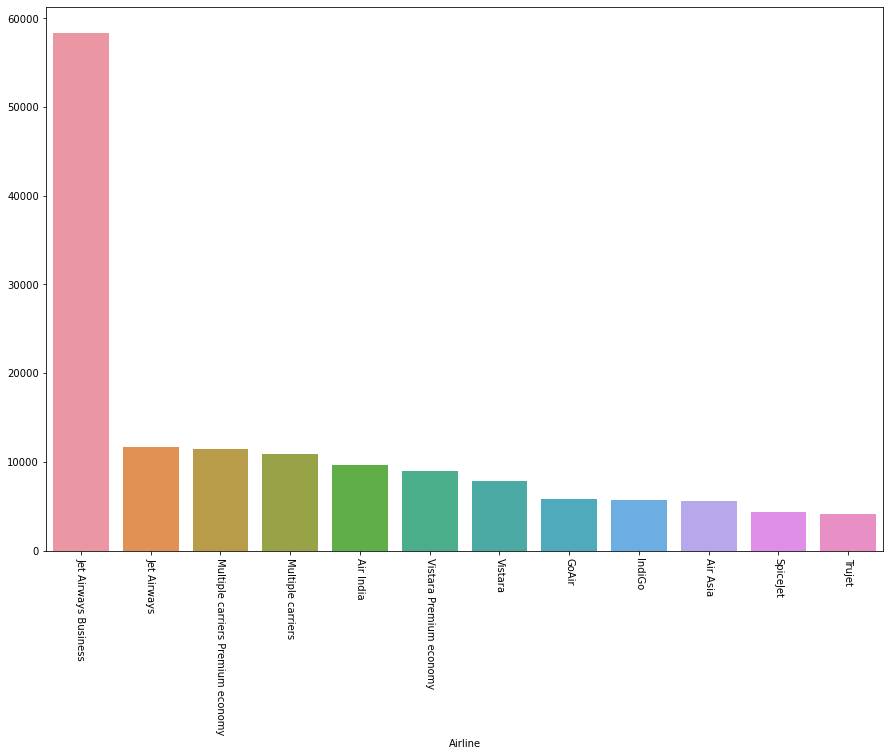

In [64]:
#Airline VS average Price

Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)
plt.show()

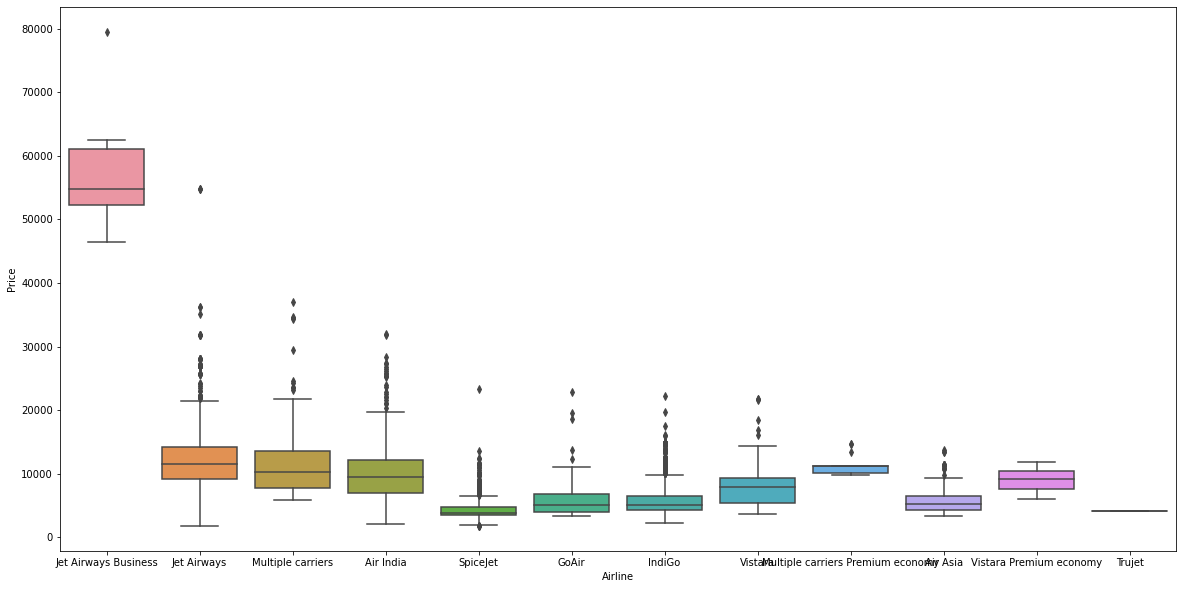

In [65]:
# Box Plot Airline VS Price

plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show()

In [66]:
# Price based on number of stops

df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

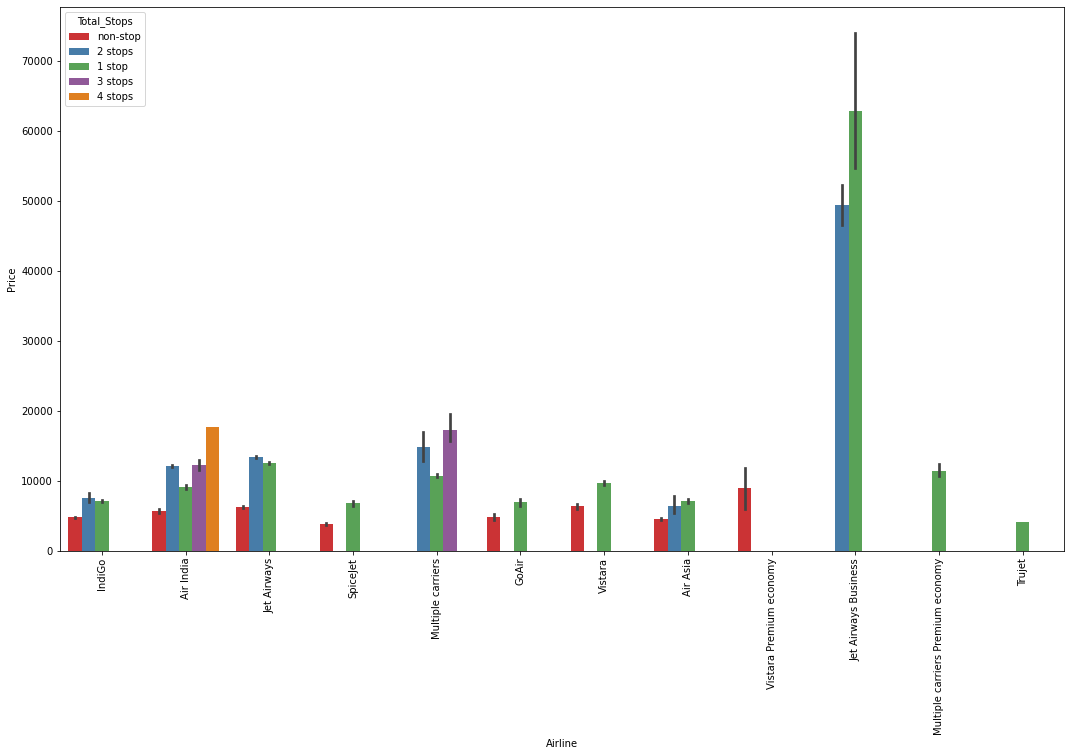

In [67]:
# Bar Plot - Same Details as chart 

plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [68]:
# Number of flights from different Airports

df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

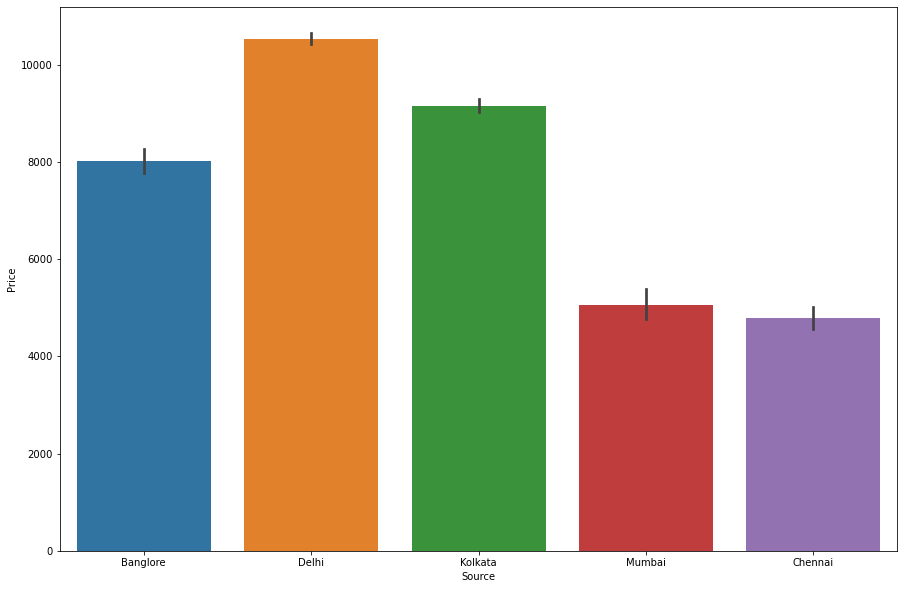

In [69]:
# Source vs Price

plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

In [70]:
# Flights in the destination

df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

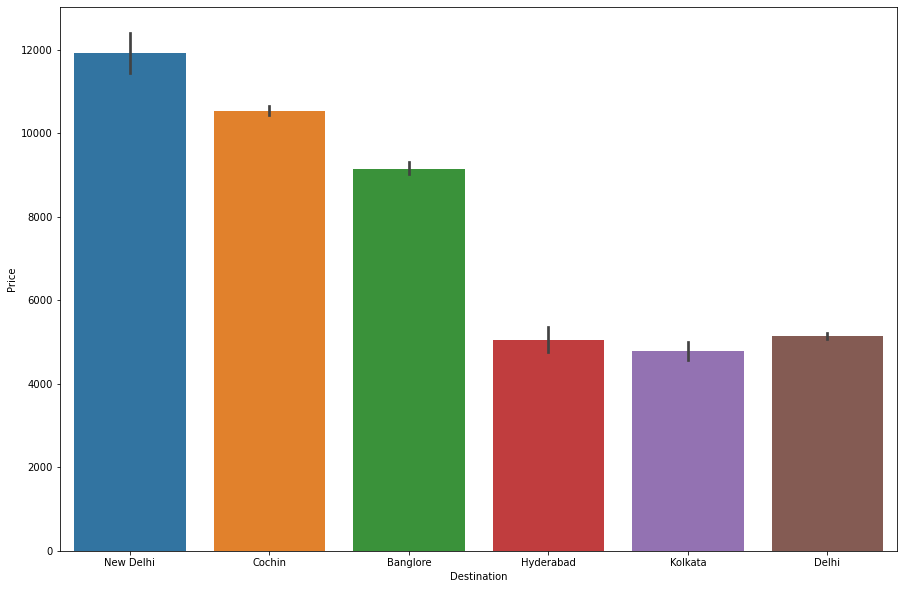

In [71]:
#Destination vs Price

plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [72]:
# There is New Delhi and Delhi in the data set, replacing New Delhi with Delhi

for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [74]:
# Display Unique Destinations

display(df['Destination'].unique())

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [75]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

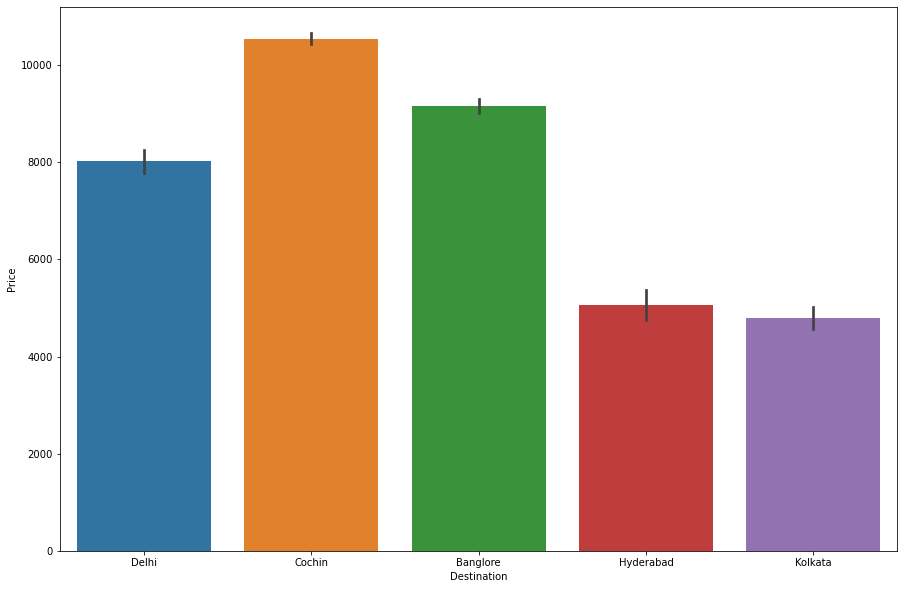

In [76]:
# Creating Bar Plot again with Price 

plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

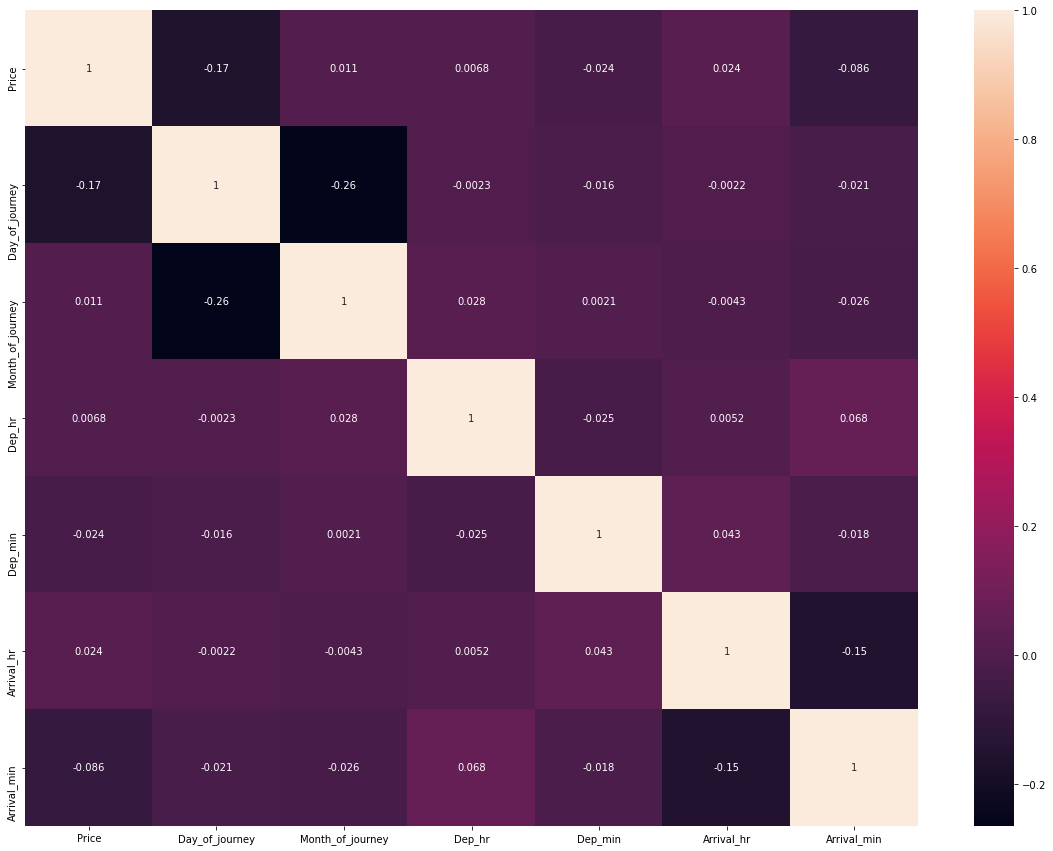

In [77]:
# Creating Heat Map
#The features are less correlated which is a good thing for us to avoid Multicollinearity

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

# One Hot Encoding

In [79]:
display (df.head(4))

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25


In [80]:
# Label Encoding - Column 'Total_Stops'

df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
display (df.head(4))

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25


In [81]:
# One Hot Encoding -Column "Airline"- Due to drop_first, there is no column for Air Asia

air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
display (air_dummy)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [82]:
#One hot encoding for columns 'Source','Destination' 

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
display (source_dest_dummy)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0
10679,0,0,1,0,0,0,0,0
10680,0,0,0,0,0,1,0,0
10681,0,0,0,0,0,1,0,0


In [83]:
# Concatenate Label Encoded and one hot encoded columns into main data frame

df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)
display (df.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25


In [84]:
#Drop Columns -Already Label Encoded or One Hot Encoded 

df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [85]:
display (df.shape)

(10682, 31)

# Modify Test Data

In [86]:
# Read Test Data

df_test=pd.read_excel("Test_set.xlsx")
display(df_test)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [87]:
#data Manipulation

df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

In [88]:
#Dep_time 

df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

In [89]:
#Arrival_time

df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [ ]:
#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

In [ ]:
#dropping the data

df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [90]:
#Handling Categorical Values 

df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [91]:
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [92]:
# Drop additional Columns

df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)
display (df_test.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Dep_Time,Arrival_Time,Duration,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,0,0,0,1,0,0,0,0,0,0,...,17:30,04:25 07 Jun,10h 55m,1,6,6,17,30,4,25
1,0,0,1,0,0,0,0,0,0,0,...,06:20,10:20,4h,1,5,12,6,20,10,20
2,0,0,0,1,0,0,0,0,0,0,...,19:15,19:00 22 May,23h 45m,1,21,5,19,15,19,0
3,0,0,0,0,0,1,0,0,0,0,...,08:00,21:00,13h,1,21,5,8,0,21,0


In [93]:
print('train_shape',df.shape)

print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 30)


In [94]:
# Creating X and Y from Training Data 

x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [95]:
display (x.head(3))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


# Model Building

In [96]:
#ExtraTreesRegressor with full data set

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

In [97]:
# Predict and Print Accuracy 

y_predict=ET_Model.predict(x)
display (r2_score(y,y_predict))

0.963311539005727

<AxesSubplot:>

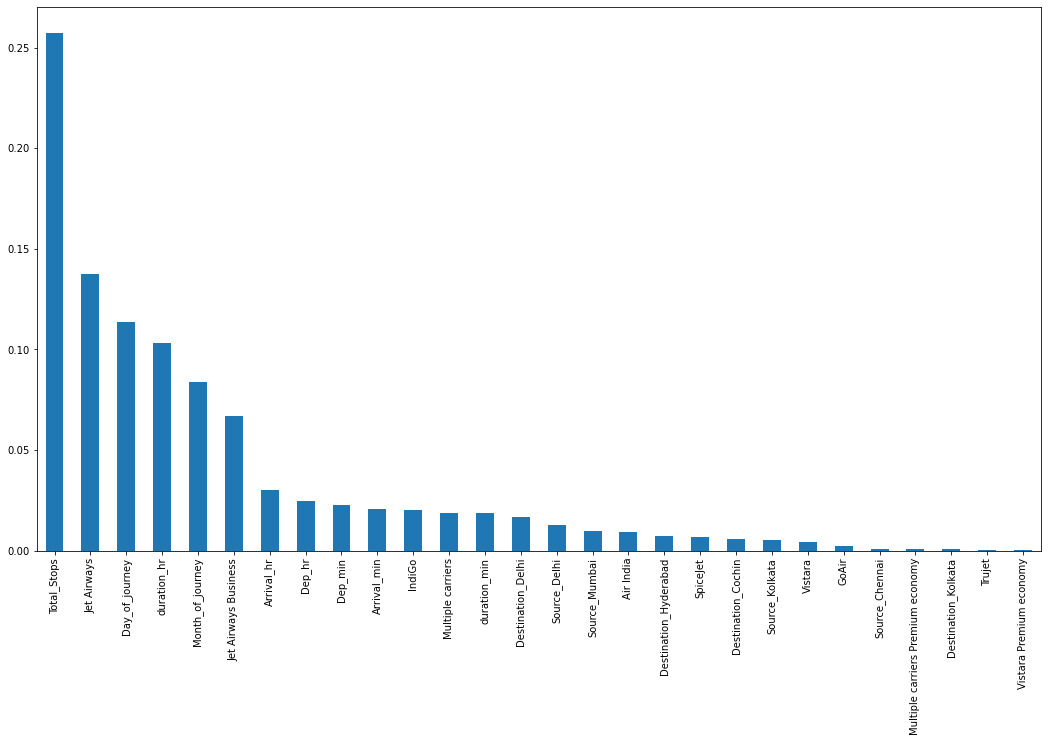

In [98]:
#Featuring Importance Graph

pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))


In [99]:
#train test split
#splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [100]:
#Preparing Extra Tree Regression with Training Data 

from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [101]:
# Prediction and Print Accuracy

y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score
display (r2_score(y_test,y_predict))

0.7661322872277718

In [102]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7954350920582257

In [104]:
# Hyperparameter Tuning and RandomizedSearchCV - Model used - RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# creating random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=1,cv=2,random_state=42, n_jobs = 1)

In [108]:
# Fit Model

rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [109]:
# Prediction 

rf_pred=rCV.predict(X_test)
display (rf_pred)

array([12515.68640524,  4299.14484815,  6160.10035178, ...,
       11642.80021268,  9694.26393076,  8645.67953366])

In [112]:
# mean_absolute_error and mean_squared_error

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1157.4149480862966
MSE 3978646.855714531


In [113]:
# Display Accuracy

display (r2_score(y_test,rf_pred))

0.8062379592438365

In [114]:
# Model CatBoostRegressor

from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 146ms	remaining: 2m 25s
1:	learn: 4317.7245126	total: 147ms	remaining: 1m 13s
2:	learn: 4167.9871081	total: 149ms	remaining: 49.6s
3:	learn: 4030.4839609	total: 151ms	remaining: 37.6s
4:	learn: 3906.4844760	total: 152ms	remaining: 30.3s
5:	learn: 3785.4580402	total: 154ms	remaining: 25.5s
6:	learn: 3673.8662552	total: 156ms	remaining: 22.1s
7:	learn: 3582.0533069	total: 158ms	remaining: 19.5s
8:	learn: 3495.5629367	total: 159ms	remaining: 17.5s
9:	learn: 3404.7478335	total: 161ms	remaining: 15.9s
10:	learn: 3325.1004431	total: 163ms	remaining: 14.6s
11:	learn: 3254.1004651	total: 164ms	remaining: 13.5s
12:	learn: 3184.6084064	total: 166ms	remaining: 12.6s
13:	learn: 3122.3064005	total: 167ms	remaining: 11.8s
14:	learn: 3067.6550706	total: 169ms	remaining: 11.1s
15:	learn: 3014.5169632	total: 170ms	remaining: 10.5s
16:	learn: 2962.4252595	total: 172ms	remaining: 9.96s
17:	learn: 2920.1931240	total: 175ms	remaining: 9.53s
18:	le

In [115]:
# Cat Boost Prediction 

cat_pred=cat.predict(X_test)
display (cat_pred)

array([12502.97869633,  3913.57282693,  5936.5002272 , ...,
       11479.15026652, 10037.36579669,  8301.20092775])

In [116]:
# Cat Boost Accuracy

display (r2_score(y_test,cat_pred))

0.8273858089678572

In [117]:
#checking the dataype of existing data

pd.DataFrame(X_train).dtypes

Air India                             uint8
GoAir                                 uint8
IndiGo                                uint8
Jet Airways                           uint8
Jet Airways Business                  uint8
Multiple carriers                     uint8
Multiple carriers Premium economy     uint8
SpiceJet                              uint8
Trujet                                uint8
Vistara                               uint8
Vistara Premium economy               uint8
Source_Chennai                        uint8
Source_Delhi                          uint8
Source_Kolkata                        uint8
Source_Mumbai                         uint8
Destination_Cochin                    uint8
Destination_Delhi                     uint8
Destination_Hyderabad                 uint8
Destination_Kolkata                   uint8
Total_Stops                           int64
Day_of_journey                        int64
Month_of_journey                      int64
Dep_hr                          

In [ ]:
# Changing the data type for Light GBM Regressor - Convert to Integer 

X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [119]:
pd.DataFrame(X_train).dtypes

Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Source_Chennai                       uint8
Source_Delhi                         uint8
Source_Kolkata                       uint8
Source_Mumbai                        uint8
Destination_Cochin                   uint8
Destination_Delhi                    uint8
Destination_Hyderabad                uint8
Destination_Kolkata                  uint8
Total_Stops                          int64
Day_of_journey                       int64
Month_of_journey                     int64
Dep_hr                               int64
Dep_min    

In [120]:
# Creating Model LGBMRegressor

from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [121]:
# Prediction and display accuracy 

lgb_pred=lgb_model.predict(X_test)
display (r2_score(y_test,lgb_pred))

0.8030064936005559

In [126]:
# Creating Model XG Boost Regressor 
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
display (r2_score(y_test,xgb_pred))

0.8212496825906317

In [127]:
# Displaying top 5 records
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [128]:
 #Using  pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [129]:
# Display column names

display (df.columns)

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_journey',
       'Month_of_journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [133]:
# Create the data set for deployment by removing columns Route and Additional_Info

deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [134]:
# Generating the .csv file and display the data set 

deploy_df.to_csv('deploy_df.csv')
display (deploy_df)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,4107,4,9,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,0,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,0,7229,27,4,8,20,11,20,3,00
10681,0,0,0,0,0,0,0,0,0,1,...,0,12648,3,1,11,30,14,10,2,40
